In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import random
from datetime import datetime

In [2]:
solvent_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'solvent')
solvent_data.set_index('solvent_name', inplace = True)
solvent_columns = list(solvent_data.columns)

In [3]:
nucleophile_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'nucleophiles')
nucleophile_data.set_index('nucleophile_name', inplace = True)
nucleophile_columns = list(nucleophile_data.columns)

In [4]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')

catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.set_index('catalyst_name', inplace = True)
catalyst_columns = list(catalyst_data.columns)

In [5]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

#Taking care of catalyst R/S
r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')
    #print(r_catalyst_data.iloc[i, 1])
#r_catalyst_data.drop(17, inplace = True)    

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')
    #print(s_catalyst_data.iloc[i, 1])
    
catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)
catalyst_data.set_index('catalyst_name', inplace = True)

catalyst_columns = list(catalyst_data.columns)

catalyst_data

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
catalyst_name,,,,,,,,,,,,,,,,,,,,,
"(R)-2,2'-Dihydroxy-3,3'-diphenyl-1,1'-binaphthalene cyclic phosphate",Ph,54.388,54.395,54.3915,56.388,70,0.773891,6.89,1.70,3.33,...,-0.23000,-0.22400,-0.21100,-0.186000,1085.06,364.3460,1306.55,271.6062,2.54600,266.5125
"(R)-3,3′-Bis(4-nitrophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-NO2C6H4,52.789,52.801,52.7950,56.202,64,0.920026,8.28,1.70,3.34,...,-0.17700,0.01000,-0.19500,-0.207000,1086.44,320.2800,1310.44,295.3595,2.54500,266.1502
"(R)-3,3'-Bis[4-(2,4,6-trimethylphenyl)phenyl]-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","4-(2,4,6-MeC6H2)C6H4",53.962,53.963,53.9625,56.355,38,0.296369,12.27,2.97,4.61,...,-0.20700,-0.05300,-0.22300,-0.199000,1085.55,356.6200,1306.58,242.2277,2.54600,266.3224
"(R)-3,3′-Bis(4-chlorophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-ClC6H4,53.704,53.718,53.7110,56.219,67,-0.855520,8.21,1.70,3.33,...,-0.23200,-0.03000,-0.25000,-0.190000,1085.19,338.5586,1306.11,286.4410,2.54600,266.1394
"(R)-3,3'-Bis(4-diphenyl)-1,1'-binaphthyl 2,2'-diyl hydrogenphosphate",4-PhC6H4,42.215,52.094,47.1545,55.769,50,-0.262375,11.22,2.01,3.50,...,-0.19550,-0.06650,-0.20200,-0.183500,1087.44,332.8368,1317.37,222.6765,2.53900,268.1404
"(R)-3,3′-Bis(4-trifluoromethylphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-CF3C6H4,53.619,53.627,53.6230,56.229,56,-0.521551,8.28,1.83,3.34,...,-0.19300,-0.17200,-0.17700,-0.184000,1086.23,355.7629,1307.21,397.3333,2.54500,266.1523
"(R)-3,3′-Bis(3,5-dinitrolphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-NO2C6H3",59.563,59.562,59.5625,55.628,66,-0.026551,7.58,1.70,5.12,...,0.02900,-0.17300,0.01300,-0.154000,1087.41,296.0611,1317.62,300.6142,2.54300,266.2896
"(R)-3,3'-Bis(3,5-diphenyl)phenyl-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","3,5-PhC6H3",42.585,60.259,51.4220,54.746,36,-0.991779,8.59,2.59,7.06,...,-0.04700,-0.18750,-0.05650,-0.171500,1085.98,366.5389,1310.24,248.6693,2.54800,269.8459
"(R)-3,3′-Bis[3,5-bis(trifluoromethyl)phenyl]-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-(CF3)2-C6H3",55.665,55.883,55.7740,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.14850,-0.16150,-0.16650,-0.157000,1086.10,320.0554,1312.33,202.3039,2.54400,266.3457


In [6]:
iminium_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'iminiums')
iminium_data.rename(columns = {'imine': 'iminium_name', 'electronic energy difference (kcal/mol) ': 'electronic energy difference (kcal/mol)'}, inplace = True)
#removed space at the end of electronic energy
iminium_data.set_index('iminium_name', inplace = True)
iminium_data.drop(labels = ['Unnamed: 1'], axis = 1, inplace = True)
for i in range(1, 181):
    z_iminium_name = '(Z)-Iminium ' + str(i)
    e_iminium_name = '(E)-Iminium ' + str(i)
    iminium_data.loc[z_iminium_name, 'electronic energy difference (kcal/mol)'] = iminium_data.loc[e_iminium_name, 'electronic energy difference (kcal/mol)']
iminium_columns = list(iminium_data.columns)

In [7]:
iminium_data.head()

,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,PGB1,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
iminium_name,,,,,,,,,,,,,,,,,,,,,
(E)-Iminium 1,3474.83,97.5295,-0.426,0.442,0.487,-0.464,-0.697,0.030,8.85,1.76,...,3.59,1.7,2.12,4.61,1.7,7.04,-0.40205,-0.17518,201.89,1.62
(Z)-Iminium 1,3491.05,82.0336,-0.430,0.424,0.526,-0.488,-0.687,0.017,8.84,1.77,...,3.59,1.7,2.13,4.77,1.7,7.17,-0.40330,-0.17332,193.50,1.62
(E)-Iminium 2,3400.90,359.5285,-0.447,0.457,0.477,-0.466,-0.690,0.031,8.81,1.75,...,3.59,1.7,2.12,4.76,1.7,5.63,-0.40541,-0.17578,164.07,1.86
(Z)-Iminium 2,3494.88,82.0612,-0.438,0.425,0.523,-0.503,-0.689,0.022,8.85,1.76,...,3.59,1.7,2.13,4.66,1.7,5.07,-0.40963,-0.17836,160.51,1.86
(E)-Iminium 3,3196.55,910.2524,-0.419,0.469,0.420,-0.140,-0.690,0.032,8.79,1.74,...,3.59,1.7,2.12,7.09,1.7,7.45,-0.40169,-0.18157,220.26,0.69


In [8]:
class Reaction():
    
    def __init__(self, name, entry, catalyst, nucleophile, substrate, solvent, iminium_type, iminium, majorenantiomer, minorenantiomer, ee, G):
        self.name = name
        self.entry = entry
        self.catalyst = catalyst
        self.nucleophile = nucleophile
        self.substrate = substrate
        self.solvent = solvent
        self.iminium_type = iminium_type
        self.iminium = iminium
        self.majorenantiomer = majorenantiomer
        self.minorenantiomer = minorenantiomer
        self.ee = ee
        self.G = G
            
        self.solvent_properties = dict()
        for column in solvent_columns:
            self.solvent_properties[column] = solvent_data.loc[solvent, column]
            
        self.catalyst_properties = dict()
        for column in catalyst_columns:
            self.catalyst_properties[column] = catalyst_data.loc[catalyst, column]
            
        self.nucleophile_properties = dict()
        for column in nucleophile_columns:
            self.nucleophile_properties[column] = nucleophile_data.loc[nucleophile, column]
        
        self.e_iminium = '(E)-' + str(iminium)
        self.z_iminium = '(Z)-' + str(iminium)
        
        self.e_iminium_properties = dict()
        self.z_iminium_properties = dict()
        for column in iminium_columns:
            self.e_iminium_properties[column] = iminium_data.loc[self.e_iminium, column]
            self.z_iminium_properties[column] = iminium_data.loc[self.z_iminium, column]
            
        
            
    def __repr__(self):
        return "Reaction - {}".format(self.name)
        #iminium stuff

In [9]:
reactions = dict()

def process_data(reaction_number, reaction, iminium_type, sheetname = None):
    reaction_file = '/Users/jlisd/Downloads/AI Chem/AI Chem/reaction info 5-23/' + str(reaction_number) + ' ' + reaction + '.xlsx'
    if sheetname == None:
        data = pd.read_excel(reaction_file)
    else:
        data = pd.read_excel(reaction_file, sheet_name = sheetname)
        
    data.set_index('entry', inplace = True)
    
    entries = len(data)
    for entry in range(1, entries + 1):
        if sheetname == None:
            reaction_name = reaction + ' ' + str(entry)
        else:
            reaction_name = reaction + ' ' + sheetname + ' ' + str(entry)
        
        
        reactions[reaction_name] = Reaction(reaction_name, 
                                            entry,
                                            data.loc[entry, 'Catalyst'],
                                            data.loc[entry, 'Nucleophile'],
                                            data.loc[entry, 'Substrate'],
                                            data.loc[entry, 'Solvent'],
                                            iminium_type,
                                            data.loc[entry, 'Iminium'],
                                            data.loc[entry, 'Major Enantiomer'],
                                            data.loc[entry, 'Minor Enantiomer'],
                                            data.loc[entry, 'ee'],
                                            data.loc[entry, 'ΔΔG‡'])
        


In [10]:
process_data(1, 'Addition of Alcohols', 'E', 'Scope')
process_data(2, 'Addition of thiols', 'E', 'Catalyst & solvent screening da')
process_data(2, 'Addition of thiols', 'E', 'Effect of catalyst loading')
process_data(2, 'Addition of thiols', 'E', 'Imine scope')
process_data(2, 'Addition of thiols', 'E', 'Thiol scope')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Catalyst screening data')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Scope')
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Optimization of catalyst and re")
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Imine scope")
process_data(5, 'Addition of diazoacetamides', 'E', 'Catalyst screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Solvent screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Substrate(s) scope')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Catalyst screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Solvent screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Imine scope')
process_data(7, 'Peroxidation of imines', 'E', 'Catalyst screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Solvent screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Substrate(s) scope')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Catalyst screening and reaction')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Scope')
process_data(9, 'Transfer Hydrogenation of Enamides', 'E', 'Scope')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Catalyst screening data')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Imine scope')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Catalyst screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Solvent screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Imine scope')
process_data(12, 'Reductive amination of N-aryl imines (Macmillan)', 'Z', 'Reaction optimization')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Imine scope')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Benzothiazoline screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Imine scope')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Imine scope')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 1 benzothiazoline')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 2 dihydropyridine')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Catalyst screening data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Solvent data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Imine scope')
#process_data(18, 'Addition of enecarbamates to benzoyl imines')
#process_data(19, 'Hydrogenation of fluorinated alkynyl ketimines')
#process_data(20, 'Addition of thiols to imines (Denmark)')

In [11]:
print(len(reactions))

381


In [12]:
catalyst = pd.DataFrame(columns = ['Reaction'] + catalyst_columns)
catalyst.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        catalyst.loc[reaction, column] = reactions[reaction].catalyst_properties[column]
        
#first column is numerical

In [13]:
catalyst.head()

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 2,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 3,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 4,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 5,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953


In [14]:
nucleophile = pd.DataFrame(columns = ['Reaction'] + nucleophile_columns)
nucleophile.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        nucleophile.loc[reaction, column] = reactions[reaction].nucleophile_properties[column]
        
#first column is numerical

In [15]:
nucleophile.head()

,nucleophile,H (nucleophile),X,Nu,nXH,iXH,HOMO (nucleophile),LUMO (nucleophile),Polarizability (nucleophile),L,B1,B5,bond distance H-X,H-X-Nu,H-X-CNu
Reaction,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,methanol,0.458,-0.707,-0.707,3899.4,40.1897,-0.35328,0.0626,18.27,3.99,1.4,3.17,0.96,180,180
Addition of Alcohols Scope 2,ethanol,0.464,-0.717,-0.717,3893.54,39.6036,-0.34808,0.06264,30.23,5.03,1.2,3.41,0.96,180,180
Addition of Alcohols Scope 3,isopropanol,0.461,-0.717,-0.717,3877.1,28.7764,-0.34588,0.05777,42.01,5.03,1.13,4.45,0.96,180,180
Addition of Alcohols Scope 4,tert-butanol,0.459,-0.722,-0.722,3859.15,22.2253,-0.34415,0.05141,53.61,5.03,1.44,4.44,0.96,180,180
Addition of Alcohols Scope 5,2-chloroethanol,0.471,-0.704,-0.704,3851.9,43.4805,-0.3582,0.05955,40.75,3.98,1.4,4.44,0.96,180,180


In [16]:
solvent = pd.DataFrame(columns = ['Reaction'] + solvent_columns)
solvent.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        solvent.loc[reaction, column] = reactions[reaction].solvent_properties[column]
        
#first column is numerical

In [17]:
solvent.head()

,solvent,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,Narumi Geometric Topological,Total structure connectivity,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588


In [18]:
iminium = pd.DataFrame(columns = ['Reaction', "iminium_type"] + iminium_columns)
iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].z_iminium_properties[column]

            

In [19]:
iminium.head()

,iminium_type,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67


In [20]:
ee = pd.DataFrame(columns = ['Reaction', 'ee'])
ee.set_index('Reaction', inplace = True)

for reaction in reactions:
    ee.loc[reaction, 'ee'] = reactions[reaction].ee

In [21]:
Y = pd.DataFrame(columns = ['Reaction', 'ΔΔG‡'])
Y.set_index('Reaction', inplace = True)

for reaction in reactions:
    Y.loc[reaction, 'ΔΔG‡'] = reactions[reaction].G
    

In [22]:
print(catalyst.shape, nucleophile.shape, solvent.shape, iminium.shape, ee.shape)

(381, 85) (381, 15) (381, 160) (381, 22) (381, 1)


In [23]:
X_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1), 
               iminium.drop(['iminium_type'], axis = 1)], axis = 1)
X_iminium.shape

(381, 278)

In [24]:
X_iminium

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,11.09,1.96,3.29,-0.38303,-0.18662,288.98,1.14
Strecker Reaction (with ketimines) Imine scope 7,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,11.09,1.97,3.29,-0.39109,-0.19325,293.53,1.22
Strecker Reaction (with ketimines) Imine scope 8,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,8.36,1.73,3.3,-0.38516,-0.19602,223.73,2.41


In [25]:
#no iminium features
X_no_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_iminium.shape

(381, 257)

In [26]:
X_no_nucleophile = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
                   solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_nucleophile.shape

(381, 243)

In [27]:
for reaction in reactions:
    if iminium.loc[reaction, 'iminium_type'] == 'Z':
        Y.loc[reaction, 'ΔΔG‡'] = Y.loc[reaction, 'ΔΔG‡'] * (-1)

In [28]:
Y

,ΔΔG‡
Reaction,
Addition of Alcohols Scope 1,2.05829
Addition of Alcohols Scope 2,1.74348
Addition of Alcohols Scope 3,1.62926
Addition of Alcohols Scope 4,1.88181
Addition of Alcohols Scope 5,1.88181
...,...
Strecker Reaction (with ketimines) Imine scope 6,-0.840427
Strecker Reaction (with ketimines) Imine scope 7,-1.01725
Strecker Reaction (with ketimines) Imine scope 8,-0.767712


###############################################################################################################################

Reactions 18 - 20

###############################################################################################################################

In [29]:
#out of sample
X_oos = pd.read_excel('X_oos.xlsx', index = 'Reaction')
X_oos_iminium = pd.read_excel('X_oos_iminium.xlsx', index = Reaction)
Y_oos = pd.read_excel('Y_oos.xlsx', index = 'Reaction')

X_oos.set_index('Reaction', inplace = True)
X_oos_iminium.set_index('Reaction', inplace = True)
Y_oos.set_index('Reaction', inplace = True)

In [30]:
#X_oos_iminium = pd.concat([X_oos, iminium_oos.drop(['iminium_type'], axis = 1)], axis = 1)

In [31]:
#X_oos_iminium.to_excel('X_oos_iminium.xlsx')

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [36]:
random_state = random.seed(datetime.now())
test_size = 0.5
X = X_iminium

In [39]:
lasso_model = Lasso(alpha = 0.005)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

lasso_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = lasso_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.3637083842245423
r^2: 0.8919636710438591
Total r^2 score: 0.9003424316564702


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.498709582876558, tolerance: 0.04995948213745946
  positive)


In [253]:
OOS_pred = lasso_model.predict(X_oos_iminium.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 0.6253094909601152
Mean Absolute Error 18: 0.6606708392373688
Mean Absolute Error 19: 0.9354655592158918
Mean Absolute Error 20: 0.6314138544809873
r^2: 0.871015173867575


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,2.169290,1.427031
Addition of enecarbamates to benzoyl imines 2,1.963952,1.326447
Addition of enecarbamates to benzoyl imines 3,1.963952,1.584206
Addition of enecarbamates to benzoyl imines 4,1.963952,1.584206
Addition of enecarbamates to benzoyl imines 5,1.881808,1.586258
Addition of enecarbamates to benzoyl imines 6,2.304448,1.401476
Addition of enecarbamates to benzoyl imines 7,2.169290,1.378492
Addition of enecarbamates to benzoyl imines 8,2.169290,1.522516
Addition of enecarbamates to benzoyl imines 9,2.304448,1.522516


In [142]:
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_model.coef_), pd.DataFrame(np.abs(lasso_model.coef_))], axis = 1)
features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
features.set_index('Feature', inplace = True)

features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Coefficient', 'Abs Val Coefficient']]
        
features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.001:
  #      print(i, features.index[i])



,type,Coefficient,Abs Val Coefficient
Feature,,,
SB1,iminium,-1.257278,1.257278
PG,iminium,1.131073,1.131073
SubS,iminium,0.750529,0.750529
SL,iminium,0.525361,0.525361
B1,nucleophile,0.330388,0.330388
Polarity,solvent,0.270560,0.270560
Variation,solvent,-0.240233,0.240233
B5,nucleophile,-0.172189,0.172189
Centralization,solvent,0.158416,0.158416


In [129]:
#features.to_excel('features.xlsx', sheet_name = "Lasso")

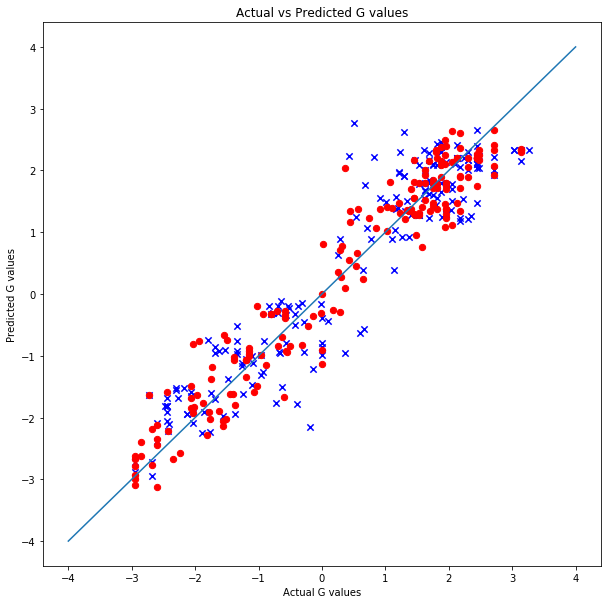

In [143]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

###############################################################################################################################

Standardization

###############################################################################################################################

In [48]:
scaler = StandardScaler()
X_total = pd.concat([X_iminium, X_oos_iminium])
X_total_scaled = scaler.fit_transform(X_total)

X_scaled = X_total_scaled[:381, :]
X_oos_scaled = X_total_scaled[381:, :]

X_total.iloc[381:, :]
#X_scaled = scaler.fit_transform(X)
#Y_scaled = scaler.fit_transform(Y)
#X_oos_scaled = scaler.fit_transform(X_oos_iminium)
#Y_oos_scaled = scaler.fit_transform(Y_oos)

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of enecarbamates to benzoyl imines 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,7.8,1.89,3.39,-0.43856,-0.22976,201.34,6.44
Addition of enecarbamates to benzoyl imines 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.74,1.76,4.61,-0.4406,-0.23262,196.15,6.88
Addition of enecarbamates to benzoyl imines 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.74,1.8,4.36,-0.44079,-0.23058,192.92,7.42
Addition of enecarbamates to benzoyl imines 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.74,1.8,4.36,-0.44079,-0.23058,192.92,7.42
Addition of enecarbamates to benzoyl imines 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,8.77,1.8,3.41,-0.43199,-0.22044,214.27,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Addition of thiols to imines (Denmark) 30,74.179,74.164,74.1715,54.611,47,0.123573,11.16,3.27,7.58,6.83,...,2.58,1.09,1.09,8.03,1.72,4.49,-0.44066,-0.23938,217.29,8.09
Addition of thiols to imines (Denmark) 31,74.179,74.164,74.1715,54.611,47,0.123573,11.16,3.27,7.58,6.83,...,2.58,1.09,1.09,8.03,1.72,4.49,-0.44066,-0.23938,217.29,8.09
Addition of thiols to imines (Denmark) 32,74.179,74.164,74.1715,54.611,47,0.123573,11.16,3.27,7.58,6.83,...,2.58,1.09,1.09,8.03,1.72,4.49,-0.44066,-0.23938,217.29,8.09


In [176]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,-0.777111,-0.965682,-0.802021,-0.599697,-0.429803,-0.476946,-0.767796,-1.175582,-0.533121,1.012385
1,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,-0.777111,-0.965682,-0.802021,-0.599697,-0.429803,-0.476946,-0.767796,-1.175582,-0.533121,1.012385
2,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,-0.777111,-0.965682,-0.802021,-0.599697,-0.429803,-0.476946,-0.767796,-1.175582,-0.533121,1.012385
3,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,-0.777111,-0.965682,-0.802021,-0.599697,-0.429803,-0.476946,-0.767796,-1.175582,-0.533121,1.012385
4,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,-0.777111,-0.965682,-0.802021,-0.599697,-0.429803,-0.476946,-0.767796,-1.175582,-0.533121,1.012385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,0.219822,0.842521,0.236030,3.320803,2.596230,-0.577314,1.236519,1.268768,2.150432,-0.623232
377,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,0.219822,0.842521,0.236030,3.320803,2.712615,-0.577314,0.965920,0.942756,2.263500,-0.599570
378,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,0.219822,0.842521,0.236030,0.848987,-0.080645,-0.567277,1.165008,0.806549,0.528969,-0.247602
379,0.927754,0.999143,0.965864,0.038661,0.81003,-1.023981,-1.13714,-1.019781,0.473599,1.482724,...,0.219822,0.842521,0.236030,1.337917,-0.429803,0.647177,1.220404,1.278111,1.371881,-0.454642


In [263]:
lasso = Lasso(alpha = 0.01)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

lasso.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = lasso.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

results.head(30)

MSE: 0.35681235750663565
r^2: 0.8867773162976376
Total r^2 score: 0.9092657100907431


,Actual,Predicted
Reaction,,
Strecker Reaction (with aldimines) Imine scope 2,1.8018,1.501907
Peroxidation of imines Substrate(s) scope 10,1.80897,2.030088
Transfer Hydrogenation of N-aryl imines (List) Catalyst screening data 4,-0.392754,-0.936071
Reductive amination of aliphatic ketones by benzothiazoline Imine scope 6,-1.50595,-2.068275
Addition of diazomethylphosphonates Optimization of catalyst and re 4,1.88561,1.953803
Transfer Hydrogenation of N-aryl imines (Rueping) Imine scope 3,-1.20112,-1.157096
Reductive amination of N-aryl imines (Macmillan) Reaction optimization 3,-0.226397,-1.152884
Addition of diazomethylphosphonates Optimization of catalyst and re 17,2.45065,1.901421
Strecker Reaction (with ketimines) Imine scope 9,-0.641814,-0.401781


In [257]:
lasso.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'random',
 'tol': 0.0001,
 'warm_start': False}

In [262]:
OOS_pred = lasso.predict(X_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 0.6627849856283866
Mean Absolute Error 18: 0.18218992058879752
Mean Absolute Error 19: 1.1504050973464426
Mean Absolute Error 20: 0.6702395640856351
r^2: 0.8632849694905524


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,2.169290,1.920482
Addition of enecarbamates to benzoyl imines 2,1.963952,1.992514
Addition of enecarbamates to benzoyl imines 3,1.963952,2.161184
Addition of enecarbamates to benzoyl imines 4,1.963952,2.161184
Addition of enecarbamates to benzoyl imines 5,1.881808,1.948832
Addition of enecarbamates to benzoyl imines 6,2.304448,2.084140
Addition of enecarbamates to benzoyl imines 7,2.169290,2.189466
Addition of enecarbamates to benzoyl imines 8,2.169290,2.313636
Addition of enecarbamates to benzoyl imines 9,2.304448,2.313636


In [220]:
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso.coef_), pd.DataFrame(np.abs(lasso.coef_))], axis = 1)
features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
features.set_index('Feature', inplace = True)

features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Coefficient', 'Abs Val Coefficient']]
        
features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.001:
  #      print(i, features.index[i])



,type,Coefficient,Abs Val Coefficient
Feature,,,
N,iminium,-0.849139,0.849139
C,iminium,-0.600229,0.600229
i NH,iminium,-0.429809,0.429809
LUMO (iminium),iminium,-0.425314,0.425314
H-X-CNu,nucleophile,0.409240,0.409240
SL,iminium,0.344324,0.344324
Topological charge index of order 2,solvent,0.290519,0.290519
Polarizability (iminium),iminium,0.262874,0.262874
ALOGP1,solvent,-0.192036,0.192036


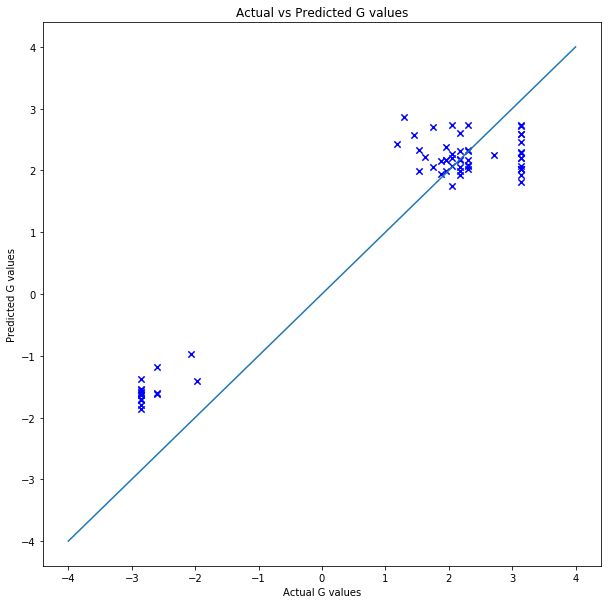

In [304]:
x = np.linspace(-4,4,10)

plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'b', marker = 'x', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)

plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

###############################################################################################################################

Run model 100 times

###############################################################################################################################

In [242]:
def run_lasso(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'test r^2', 'train r^2', 'total r^2', 'OOS r^2', 'OOS 18 MAE', 'OOS 19 MAE', 'OOS 20 MAE'])
    for i in range(iterations):
        #develop model
        lasso_model = Lasso(alpha = 0.01)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        lasso_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
        
        #evaluating performance & scores
        Y_pred = lasso_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = lasso_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])

        OOS_pred = lasso_model.predict(X_oos_iminium)

        oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
        oos_results.set_index('Reaction', inplace = True)
        oos_results.columns = ['Actual', 'Predicted']
        
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'test r^2': r2_score(Y_test, Y_pred),
                    'train r^2': r2_score(train_results['Actual'], train_results['Predicted']),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted']),
                    'OOS r^2': mean_squared_error(Y_oos, OOS_pred),
                    'OOS 18 MAE': mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15]),
                    'OOS 19 MAE': mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30]),
                    'OOS 20 MAE': mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])}, ignore_index = True)

        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_model.coef_), pd.DataFrame(np.abs(lasso_model.coef_))], axis = 1)
        features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
        features.set_index('Feature', inplace = True)

        features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

        if i == 0:
            total_features = features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Abs Val Coefficient'] += features.loc[feature, 'Abs Val Coefficient']
        
    
    #add average for scores
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'test r^2': averages.iloc[0,2],
                           'train r^2': averages.iloc[0,3],
                           'total r^2': averages.iloc[0,4],
                           'OOS r^2': averages.iloc[0,5],
                           'OOS 18 MAE': averages.iloc[0,6],
                           'OOS 19 MAE': averages.iloc[0,7],
                           'OOS 20 MAE': averages.iloc[0,8]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Coefficient', 'Abs Val Coefficient']]
    total_features = total_features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
    
    
    
    return scores, total_features

In [243]:
results, features = run_lasso(100)
print(results)
print(results.std())

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.190896319554355, tolerance: 0.05904219806790304
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.439150807084964, tolerance: 0.057296826935856374
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.90290238268516, tolerance: 0.059497515517644164
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.840287719436176, tolerance: 0.06103303990304421
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.397057880107575, tolerance: 0.05705410710223721
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.003015266159302, tolerance: 0.054840957162752016
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.098298399901964, tolerance: 0.05485354220208829
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.859573555064614, tolerance: 0.056647036877949065
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.193681783597505, tolerance: 0.05588601904005484
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.870076302258067, tolerance: 0.05806180413095022
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.28793796855865, tolerance: 0.057821574883152
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.60065643557652, tolerance: 0.058144131957438075
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

    iteration       MSE  test r^2  train r^2  total r^2   OOS r^2  OOS 18 MAE  \
0           1  0.462017  0.842571   0.907190   0.876158  2.567326    3.037294   
1           2  0.430586  0.858041   0.918486   0.888362  1.321299    2.047184   
2           3  0.512275  0.825252   0.934303   0.881448  2.186380    2.811286   
3           4  0.372225  0.872740   0.912997   0.894882  3.097546    3.358152   
4           5  0.415186  0.862168   0.906268   0.884445  2.882844    3.108303   
..        ...       ...       ...        ...        ...       ...         ...   
96         97  0.362034  0.884292   0.909361   0.896562  2.082484    2.710216   
97         98  0.465013  0.851826   0.921362   0.885341  1.868308    2.555046   
98         99  0.635249  0.775664   0.916326   0.850508  2.381175    2.794369   
99        100  0.514988  0.815207   0.935929   0.880311  2.024616    2.282310   
100   average  0.443571  0.853032   0.918093   0.886144  2.136679    2.618693   

     OOS 19 MAE  OOS 20 MAE

###############################################################################################################################

Run standardized model 100 times

###############################################################################################################################

In [70]:
def run_lasso_standard(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'test r^2', 'train r^2', 'total r^2', 'OOS r^2', 'OOS 18 MAE', 'OOS 19 MAE', 'OOS 20 MAE'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        lasso = Lasso(alpha = 0.02,tol = 0.00001, selection = "random")
        X_train, X_test, Y_train, Y_test = train_test_split(X_total_is_scaled, Y, test_size = test_size, random_state = random_state)

        lasso.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = lasso.predict(X_test)

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = lasso.predict(X_train)
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])
        
        OOS_pred = lasso.predict(X_oos_scaled)

        oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
        oos_results.set_index('Reaction', inplace = True)
        oos_results.columns = ['Actual', 'Predicted']
        
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'test r^2': r2_score(Y_test, Y_pred),
                    'train r^2': r2_score(train_results['Actual'], train_results['Predicted']),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted']),
                    'OOS r^2': mean_squared_error(Y_oos, OOS_pred),
                    'OOS 18 MAE': mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15]),
                    'OOS 19 MAE': mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30]),
                    'OOS 20 MAE': mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso.coef_), pd.DataFrame(np.abs(lasso.coef_))], axis = 1)
        features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
        features.set_index('Feature', inplace = True)

        features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

        if i == 0:
            total_features = features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Abs Val Coefficient'] += features.loc[feature, 'Abs Val Coefficient']
                
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'test r^2': averages.iloc[0,2],
                           'train r^2': averages.iloc[0,3],
                           'total r^2': averages.iloc[0,4],
                           'OOS r^2': averages.iloc[0,5],
                           'OOS 18 MAE': averages.iloc[0,6],
                           'OOS 19 MAE': averages.iloc[0,7],
                           'OOS 20 MAE': averages.iloc[0,8]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Coefficient', 'Abs Val Coefficient']]
    total_features = total_features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
    
    return scores, total_features

In [71]:
results, features = run_lasso_standard(100)
print(results)
print(results.std())

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025006515424010445, tolerance: 0.005802638225283802
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.051401432685608484, tolerance: 0.0057294497329825
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006392649495751357, tolerance: 0.005594188399687669
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

    iteration       MSE  test r^2  train r^2  total r^2   OOS r^2  OOS 18 MAE  \
0           1  0.316907  0.896969   0.912588   0.905005  0.515251    0.403708   
1           2  0.303775  0.898380   0.908992   0.904190  0.541395    0.526366   
2           3  0.314349  0.896431   0.913466   0.904931  0.524939    0.392538   
3           4  0.344501  0.884099   0.923521   0.904611  0.522194    0.635915   
4           5  0.365687  0.872571   0.928580   0.902014  0.495047    0.210660   
..        ...       ...       ...        ...        ...       ...         ...   
96         97  0.297704  0.909614   0.895469   0.904348  0.609448    0.432998   
97         98  0.413418  0.842950   0.935146   0.895190  0.496850    0.188768   
98         99  0.371633  0.880087   0.904300   0.891908  0.579032    0.475119   
99        100  0.324217  0.895965   0.912101   0.903787  0.536619    0.447289   
100   average  0.362486  0.879754   0.919231   0.900042  0.563676    0.414626   

     OOS 19 MAE  OOS 20 MAE

In [64]:
#features.head(30)

###############################################################################################################################

Hyperparameter Tuning

###############################################################################################################################

In [33]:
#iminium + nucleophile
X_total_is_scaled = pd.read_excel('X (all features, IS, scaled).xlsx').set_index('Reaction')
X_total_oos_scaled = pd.read_excel('X (all features, OOS, scaled).xlsx').set_index('Reaction')

In [34]:
#iminium
X_imi_is_scaled = pd.read_excel('X (iminium, IS, scaled).xlsx').set_index('Reaction')
X_imi_oos_scaled = pd.read_excel('X (iminium, OOS, scaled).xlsx').set_index('Reaction')

In [35]:
#nucleophile
X_nuc_is_scaled = pd.read_excel('X (nucleophile, IS, scaled).xlsx').set_index('Reaction')
X_nuc_oos_scaled = pd.read_excel('X (nucleophile, OOS, scaled).xlsx').set_index('Reaction')

In [41]:
forest = RandomForestRegressor()
cv = RepeatedKFold(n_splits = 4, n_repeats = 3, random_state = 615)

grid = dict()

grid['n_estimators'] = np.array([125, 150, 175])

search = GridSearchCV(forest, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
results = search.fit(X_scaled, Y)

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [33]:
forest = RandomForestRegressor()

In [42]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
results

MAE: -0.303
Config: {'n_estimators': 150}


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=615),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                          

In [34]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
lasso = Lasso(tol = 0.00001)
cv = RepeatedKFold(n_splits = 4, n_repeats = 3, random_state = 615)

grid = dict()
grid['alpha'] = np.array([0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001])
#grid['tol'] = np.array([0.0001, 0.00003, 0.00001, 0.000003, 0.000001])

search = GridSearchCV(lasso, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
results = search.fit(X_total_is_scaled, Y)

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021946930944849896, tolerance: 0.011550391740217115
  positive)


In [44]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
results

MAE: -0.429
Config: {'alpha': 0.004}


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=615),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=1e-05, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [42]:
knn = KNeighborsRegressor()
cv = RepeatedKFold(n_splits = 4, n_repeats = 3, random_state = 615)

grid = dict()
#grid['alpha'] = np.array([1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001])
grid['leaf_size'] = np.array([20, 30, 40, 50, 60])
grid['p'] = np.array([1, 2, 3])
grid['n_neighbors'] = np.array([1,2,3])

search = GridSearchCV(knn, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
results = search.fit(X_iminium, Y)

In [43]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
results

MAE: -0.331
Config: {'leaf_size': 20, 'n_neighbors': 3, 'p': 2}


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=615),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': array([20, 30, 40, 50, 60]),
                         'n_neighbors': array([1, 2, 3]),
                         'p': array([1, 2, 3])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

###############################################################################################################################

Notes ish

###############################################################################################################################

In [ ]:
#if sample is in high desntiy, use random forest
#if in low density use linear regression

#identify 2 most recurrent features of each category (im nuc sol cat), try to build good linear regression model (lasso)
#try everything including hyperparameter tuning and all feartures
#standardize oos and try standardized lasso

#when u standardize X and X_oos separately, may be doing them on different standards. Figure out how to do them together!!